# Introduction to Clustering

In this notebook, we look at the unsupervised machine learning technique called clustering. We use this technique when we want to learn how data is arranged, or divide it into classes or categories, but we don't have class labels.

First we load the Avocado sales data and do the usual stuff to get to the Total Volume vs. Average Price plot that we got in the last class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [4]:
path = r'C:\Users\subra\OneDrive - Lake Forest College\Lake Forest College Academics\Data Science'
#os.listdir(path)

In [5]:
df = pd.read_csv(path + '/avocado.csv',index_col=0)
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)



In [8]:
df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
df1.head()

,region_list,average_price
0,Albany,1.561036
1,Atlanta,1.337959
2,BaltimoreWashington,1.534231
3,Boise,1.348136
4,Boston,1.530888


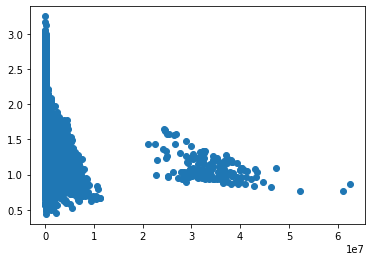

In [9]:
x = df['Total Volume']
y = df['AveragePrice']
plt.scatter(x,y)

In [10]:
data = pd.DataFrame({'Volume':x,'Price':y})
data.head()

,Volume,Price
0,64236.62,1.33
1,54876.98,1.35
2,118220.22,0.93
3,78992.15,1.08
4,51039.60,1.28


### K-means Clustering

https://en.wikipedia.org/wiki/K-means_clustering

Next we apply K-means clustering on the data. Here, we choose K random cluster means. Then we re-create the clusters by assigning each point to its closest mean. Finally we re-calculate the means. We keep doing this until the means stop moving.

[[9.07908582e+05 1.11629952e+00]
 [3.60294276e+07 1.05607143e+00]
 [4.90562293e+06 1.10304020e+00]
 [1.05947622e+05 1.49221366e+00]
 [4.15359000e+07 9.82608696e-01]
 [2.97828752e+06 1.16522388e+00]
 [3.07947727e+07 1.09600000e+00]
 [6.80382942e+06 9.09602888e-01]
 [5.86096005e+07 8.00000000e-01]
 [2.50344959e+07 1.32590909e+00]]


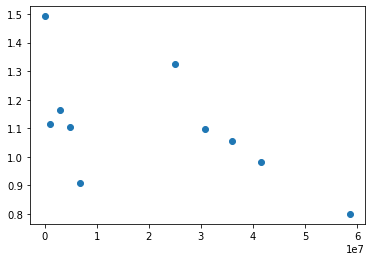

In [11]:
from sklearn.cluster import KMeans, MeanShift 
np.random.seed(42)


m1 = KMeans(10)
m1.fit(data)
print(m1.cluster_centers_)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])


### Meanshift Clustering

This is another clustering technique where we don't need to give the number of clusters

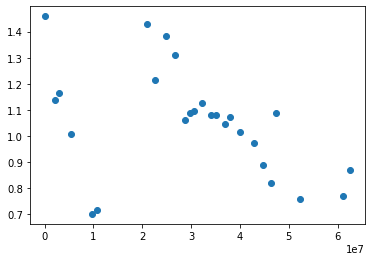

In [12]:
m2 = MeanShift()
m2.fit(data)
plt.scatter(m2.cluster_centers_[:,0],m2.cluster_centers_[:,1])
